## Spam Filtering

#### The GOAL is to classify the testing set for ham/spam. 
<br> TR-mails.zip FILES contains 2500 mails both in Ham(1721) labelled as 1 and Spam(779) labelled as 0.
<br> TT-mails.zip FILES contains 1827 mails both in Ham and Spam
<br> The file spam-mail.tr.label is the associated training labels.

## Check Installation of Vowpal Wabbit

In [1]:
try:
    import pyvw
except: 
    print r"Install Vowpal Wabbit from: https://github.com/JohnLangford/vowpal_wabbit/wiki/Tutorial"
#     help(pyvw.vw())

In [2]:
import numpy as np
import os
XTrain = np.loadtxt('spam-mail.tr.label', skiprows=1, delimiter=',', dtype='str')
YTrain = XTrain[:,-1]
YTrain = YTrain.astype(np.int)
XTrainFileNames = XTrain[:,0]
XTestFileNames = XTrain[:1827,0]
print XTrainFileNames.shape, YTrain.shape, XTestFileNames.shape
print XTrainFileNames[:5],YTrain[:5]
trainFolder = os.getcwd()+os.sep+'TR-mails'+os.sep+'TR'+os.sep
testFolder = os.getcwd()+os.sep+'TT-mails'+os.sep+'TT'+os.sep
print trainFolder,testFolder
# with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    
# for sample in XTrain:
#     with open

(2500,) (2500,) (1827,)
['1' '2' '3' '4' '5'] [0 0 1 0 0]
/media/Documents/TUM/Winter_2015/Anomaly_Detection_Challenge/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TR-mails/TR/ /media/Documents/TUM/Winter_2015/Anomaly_Detection_Challenge/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TT-mails/TT/


In [3]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
#     headers = email.message_from_file(f, headersonly)
print message#,headers
print type(message)#,type(headers)
#     parser = email.parser.Parser(f)
# print dir(parser)

From nobody Sun Jan 10 14:49:12 2016
Return-Path: ler@lerami.lerctr.org
Delivery-Date: Fri Sep 13 23:14:55 2002
Return-Path: <bengreen@mindupmerchants.com>
Received: from mindupmerchants.com
 (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])
 by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id
 g8E4EZE9029281
 for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)
Message-Id: <200209140414.g8E4EZE9029281@lerami.lerctr.org>
Received: from 192.168.0.0 by mindupmerchants.com
 with SMTP (MDaemon.PRO.v6.0.7.R)
 for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700
From: "Ben Green" <bengreen@mindupmerchants.com>
To: ler@lerctr.org
Subject: One of a kind Money maker! Try it for free!
Date: Fri, 13 Sep 2002 21:13:19 -0700
X-M5MailerProjectID: 4fb0caa2-c329-4c20-b331-229e681acee3
Reply-To: bengreen@mindupmerchants.com
MIME-Version: 1.0
Content-Type: multipart/mixed;
	boundary="----000000000000000000000"
X-Return-Path: bengreen@mindupmerchants

In [118]:
print message.keys()
print message.values()
print message['Return-Path'], message['Message-Id']
print message['Received']
print message['Subject']
print message['From']
print message['Sender']

['Return-Path', 'Delivery-Date', 'Return-Path', 'Received', 'Message-Id', 'Received', 'From', 'To', 'Subject', 'Date', 'X-M5MailerProjectID', 'Reply-To', 'MIME-Version', 'Content-Type', 'X-Return-Path', 'X-MDaemon-Deliver-To', 'X-Virus-Scanned', 'X-Status', 'X-Keywords']
['ler@lerami.lerctr.org', 'Fri Sep 13 23:14:55 2002', '<bengreen@mindupmerchants.com>', 'from mindupmerchants.com (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n\tby lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id g8E4EZE9029281\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>', 'from 192.168.0.0 by mindupmerchants.com\n\twith SMTP (MDaemon.PRO.v6.0.7.R)\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700', '"Ben Green" <bengreen@mindupmerchants.com>', 'ler@lerctr.org', 'One of a kind Money maker! Try it for free!', 'Fri, 13 Sep 2002 21:13:19 -0700', '4fb0caa2-c329-4c20-b331-229e681acee3', 'bengreen

In [5]:
parser = email.parser.HeaderParser()
headers = parser.parsestr(message.as_string())
for h in headers.items():
    print h
print type(headers), dir(headers), len(headers)

('Return-Path', 'ler@lerami.lerctr.org')
('Delivery-Date', 'Fri Sep 13 23:14:55 2002')
('Return-Path', '<bengreen@mindupmerchants.com>')
('Received', 'from mindupmerchants.com\n (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id\n g8E4EZE9029281\n for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)')
('Message-Id', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>')
('Received', 'from 192.168.0.0 by mindupmerchants.com\n with SMTP (MDaemon.PRO.v6.0.7.R)\n for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700')
('From', '"Ben Green" <bengreen@mindupmerchants.com>')
('To', 'ler@lerctr.org')
('Subject', 'One of a kind Money maker! Try it for free!')
('Date', 'Fri, 13 Sep 2002 21:13:19 -0700')
('X-M5MailerProjectID', '4fb0caa2-c329-4c20-b331-229e681acee3')
('Reply-To', 'bengreen@mindupmerchants.com')
('MIME-Version', '1.0')
('Content-Type', 'multipart/mixed;\n\tboundary="----000000000

In [6]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
    # parser.parse()

### Extract message body

In [7]:
def getEmailBody(messageStr):
    b = email.message_from_string(messageStr)
    strPayload = ''
    if b.is_multipart():
        for payload in b.get_payload():
            # if payload.is_multipart(): ...
            strPayload += str(payload.get_payload())
    else:
        strPayload += str(b.get_payload())
    return strPayload

In [8]:
def readEmailBody(XTrainFileNames, folder, fileString='TRAIN_'):
    trainEmailBody = []
    for emailFileName in XTrainFileNames:
        with open(folder+fileString+emailFileName+'.eml','r') as f:
            message = email.message_from_file(f)
            trainEmailBody.append(getEmailBody(message.as_string()))
    return trainEmailBody

In [9]:
trainEmailBody = readEmailBody(XTrainFileNames, trainFolder, 'TRAIN_')

In [10]:
print trainEmailBody[0]
print len(trainEmailBody)

<body lang=EN-US>

<div class=Section1>


<p class=MsoBodyText style='text-align:justify'><b>CONSANTLY</b> being
bombarded by so-called �FREE� money-making systems that teases you with limited
information, and when it�s all said and done, blind-sides you by demanding your
money/credit card information upfront in some slick way,<b> after-the-fact</b>!
Yes, I too was as skeptical about such offers and the Internet in general with
all its hype, as you probably are. Fortunate for me, my main business
slowed-down (<i>I have been self-employed all my life</i>), so I looked for
something to fit my lifestyle and some other way to assist me in paying my
bills, without working myself to death or loosing more money; then, this
proposal to try something new without any upfront investment (<i>great! because
I had none</i>) interested me to click on the link provided. And I don�t regret
at all that I did! I am very happy, and happy enough to recommend it to you as
a system that is true to its word. 

In [11]:
testEmailBody = readEmailBody(XTestFileNames, testFolder, 'TEST_')

In [12]:
print testEmailBody[0]
print len(testEmailBody)

At 1:16 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote:


>   "The first question I ask myself when something doesn't seem to be
>   beautiful is why do I think it's not beautiful. And very shortly you
>   discover that there is no reason." -- John Cage

"When I'm working on a problem, I never think about beauty. I think only
how to solve the problem. But when I have finished, if the solution is not
beautiful, I know it is wrong."  -- R. Buckminster Fuller

"Simplicity is the highest goal, achievable when you have overcome all
difficulties." -- Frederic Chopin

"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek

-- 
-----------------
R. A. Hettinga <mailto: rah@ibuc.com>
The Internet Bearer Underwriting Corporation <http://www.ibuc.com/>
44 Farquhar Street, Boston, MA 02131 USA
"The stoical scheme of supplying our wants by lopping off our
desires is like cutting off our feet when we want shoes."
 -- Jonathan Swift



1827


### Spamicity of a word - Analyse the words of each email message against the classification labels.¶

In [13]:
from collections import Counter
def AnalyseWordLabelContribution(XMessages, YTrain):
    XFeaturesSpam = []
    XFeaturesHam = []
    i = 0
    for message in XMessages:
        if message == None: 
            continue
#             if YTrain[i] == 0:
#                 XFeaturesSpam.append((word, YTrain[i]))
#             else:
#                 XFeaturesHam.append((word, YTrain[i]))        
        else:
            wordList = message.split()
            for word in wordList:
                if(YTrain[i] == 0):
                    XFeaturesSpam.append((word.lower(), YTrain[i]))
                elif (YTrain[i] == 1):
                    XFeaturesHam.append((word.lower(), YTrain[i]))

            i+=1
    return Counter(XFeaturesSpam), Counter(XFeaturesHam)


In [14]:
# Compute Spamicity
def computeSpamicity(XFeaturesSpam, XFeaturesHam, noOfSpamWords = 20):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
        XFeatures[word] = spamicity

    # Sort and pick top most spam words as features
    from operator import itemgetter, attrgetter    
    descSortedFeatures = sorted(XFeatures.items(), key=itemgetter(1), reverse = True)

    # Select the top most frequent spam word
    spamWordsTaken = [x for x in descSortedFeatures[0:noOfSpamWords]]
    return spamWordsTaken

In [15]:
# Compute Spamicity for each word
def computeSpamicityWords(XFeaturesSpam, XFeaturesHam):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
#         hamicity = 1-spamicity
        XFeatures[word] = spamicity
    return XFeatures

In [16]:

# X = ['Why Spend upwards of $4000 on a DVD Burner when we will show you an alternative that will do the exact same thing for just a fraction of the cost? Copy your DVD\'s NOW. Best Price on the net. Click here: http://002@www.dvdcopyxp.com/cgi-bin/enter.cgi?marketing_id=dcx009 Click to remove http://003@www.spambites.com/cgi-bin/enter.cgi?spambytes_id=100115',
#      '> On 05/09/2010 03:49 PM, Merciadri Luca wrote:>> Ron Johnson wrote:>>> I just opened a new Writer 3.2.0-9+b1 document then selected the>>> "title image" http://i.space.com/images/080702-voyager-01.jpg from>>> http://www.space.com/missionlaunches/nasa-tracking-voyager2-problem-100506.html>>> and pasted it into the document.>> I am using OO 2.4.1.>> That\'s *really* old.  If you run Stable, then you should deinstall it> and get binaries from http://www.go-oo.orgOk. I will do it. Would it be that?>>                       Take for example>> http://en.wikipedia.org/wiki/California.>> Still works, although OOo doesn\'t seem to know how to handle svg> documents.Lucky you, but it must be because of the version. Note that it doesnot _always_ hang here, that\'s purely random.- -- Merciadri LucaSee http://www.student.montefiore.ulg.ac.be/~merciadri/',
#      'Enhance your desire, pleasure and performance! 100% GUARANTEED TO SEE AN INCREASE IN SIZE AND WIDTH http://pg.exqumloaf.com/']
# YTrain = [0,1,0]
# XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(X, YTrain)
# # print XFeaturesSpam

# spamWordsTaken = computeSpamicity(XFeaturesSpam, XFeaturesHam, 10)
# print spamWordsTaken


### Extract Email Subjects

In [17]:
def extractEmailSubjects(folder,fileString, emailFileName):
    with open(folder+fileString+emailFileName+'.eml','r') as f:
        message = email.message_from_file(f)
    return message['Subject']


In [18]:
def readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_'):
    trainSubjects = []
    for fileName in XTrainFileNames:
        trainSubjects.append(extractEmailSubjects(trainFolder,fileString,fileName))
#     print len(trainSubjects)
#     print trainSubjects[:5]
    return trainSubjects
# trainSubjects = readSubjects(XTrainFileNames, trainFolder, 'TRAIN_')
# print len(trainSubjects)

### Extract specific email fields

In [19]:
def extractEmailField(folder, fileString, emailFileName, fieldName):
    with open(folder+fileString+emailFileName+'.eml','r') as f:
        message = email.message_from_file(f)
    return message[fieldName]

In [20]:
def readEmailField(fieldName, XTrainFileNames, trainFolder, fileString='TRAIN_'):
    trainField = []
    for fileName in XTrainFileNames:
        trainField.append(extractEmailField(trainFolder,fileString,fileName,fieldName))
    return trainField

# fieldName = 'Subject'
# trainField = readEmailField(fieldName, XTrainFileNames, trainFolder, 'TRAIN_')
# print len(trainField)
# assert (trainSubjects == trainField)

In [21]:
def extractEmail(folder,fileString, emailFileName):
    with open(folder+fileString+emailFileName+'.eml','r') as f:
        message = email.message_from_file(f)
    return message.as_string()

In [22]:
def readEmails(XTrainFileNames, trainFolder, fileString='TRAIN_'):
    trainEmails = []
    for fileName in XTrainFileNames:
        trainEmails.append(extractEmail(trainFolder,fileString,fileName))
#     print len(trainSubjects)
#     print trainSubjects[:5]
    return trainEmails
# trainEmails = readEmails(XTrainFileNames, trainFolder, 'TRAIN_')
# print len(trainEmails)
# print trainEmails[0]

### Extract other fields from the email message

In [121]:
#fieldName = 'Sender'
fieldName = 'From'
trainSender = readEmailField(fieldName, XTrainFileNames, trainFolder, 'TRAIN_')
testSender = readEmailField(fieldName, XTestFileNames, testFolder, 'TEST_')
# print trainSender[2]
# print trainSender[3]

In [24]:
fieldName = 'Date'
trainDate = readEmailField(fieldName, XTrainFileNames, trainFolder, 'TRAIN_')
testDate= readEmailField(fieldName, XTestFileNames, testFolder, 'TEST_')
# print trainDate[2]
# print trainDate[3]

### Check whether the email date is future.

In [25]:
from datetime import datetime
minYr = 2000
maxYr = 2010
       
def CheckFutureDate(lstYear):
    futureYr = []
    for yr in lstYear:
        if yr >= minYr and yr <= maxYr :
            futureYr.append(True)
        else:
            if yr == 2021:
                futureYr.append(True) 
            else:
    #             print emailDate
                futureYr.append(False)
    return futureYr

In [26]:
def getDates(lstDates):
    dateList = []
    # fmt = "%a, %d %b %Y %H:%M:%S"
    # date_object = datetime.strptime(string_date[:25], fmt)
    # CheckFutureDate(date_object)
    monthList = ['Jan ', 'Feb ', 'Mar ', 'Apr ', 'May ', 'Jun ', 'Jul ', 'Aug ', 'Sep ', 'Oct ', 'Nov ', 'Dec ']
    for string_date in lstDates:
        for i in monthList:
            strYearPart  = string_date.split(i)
            if len(strYearPart) == 2:
                year = strYearPart[1][:4]
                try:
                    year = int(year)
                except:
                    year = int('20' + year.split()[0])
    #                 print year, string_date

#                 dateList.append(CheckFutureDate(year))
                dateList.append(year)

    return dateList


lstTrainYear = getDates(trainDate)
lstTestYear = getDates(testDate)
# print lstTestDates
# print (lstTestYear)

In [27]:
# label = 0
# trainDateLabel, YTrainLabel = GetSpamHamMsgIdx(label, lstTrainYear, YTrain)
# print len(lstTrainYrLabel)

# # lstTrainYrLabel = getDates(trainDateLabel)
# futureTrainYrLabel = CheckFutureDate(trainDateLabel)
# # print futureTrainYrLabel

### Check for missing sender field

In [28]:
def CheckMissingSender(lstSender):
    missingSenders = []
    for sender in lstSender:
        if sender is None:
            missingSenders.append(True)
        else:
            missingSenders.append(False)
    return missingSenders

In [29]:
type(YTrain)
type(YTrain[0])
YTrain = YTrain.astype(np.int)
type(YTrain[0])

numpy.int64


### Get Spamicity of words based on Email Subject

In [30]:
trainSubjects = readSubjects(XTrainFileNames, trainFolder, 'TRAIN_')
print len(trainSubjects)
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(trainSubjects, YTrain)
# print XFeaturesSpam

SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
# print len(SubjectWordsSpamicity)
# print SubjectWordsSpamicity

2500


In [31]:
count =0
for i in xrange(len(trainSubjects)):
    if trainSubjects[i]:
        count+=1
#         print trainSubjects[i],YTrain[i]#,count,i

### Get Spamicity of words based on Email Body

In [32]:
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(trainEmailBody, YTrain)

In [33]:
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
print len(BodyWordsSpamicity)
# print BodyWordsSpamicity

72901


### Convert Spamicity/Hamicity to a feature vector for each message.

In [34]:
def computeSpamHamMetrics(message, wordSpamicity):
    spamInd =1.0
    hamInd =1.0
    if message == None:
        return 0.5,0.5
    else:
        wordList = message.split()
        for word in wordList:
            try:
                spamInd *= wordSpamicity[word.lower()]
                hamInd *= (1-wordSpamicity[word.lower()])
            except KeyError:
                spamInd *= 1.0#0.5
                hamInd *= 1.0#0.5
    return spamInd,hamInd    

In [35]:
def createSpamHamFeature(messages, wordSpamicity):
    XFeatures = []
    for message in messages:
        spam, ham = computeSpamHamMetrics(message, wordSpamicity)
        XFeatures.append([spam,ham])
    return np.array(XFeatures)

In [111]:
def computeTopSpamHamMetrics(message, wordSpamicity, noOfWords=15):
    spamInd =1.0
    hamInd =1.0
    spamList = []
    hamList = []
    if message == None:
        return 0.5,0.5
    else:
        wordList = message.split()
        for word in wordList:
            try:
                spamList.append(abs(wordSpamicity[word.lower()]-0.5))
                hamList.append(abs(wordSpamicity[word.lower()]-1.0))
#                 spamInd *= wordSpamicity[word.lower()]
#                 hamInd *= (1-wordSpamicity[word.lower()])
            except KeyError:
                spamList.append(0.5)
                hamList.append(1.0)
#                 spamInd *= 1.0#0.5
#                 hamInd *= 1.0#0.5
        spamList.sort(reverse=True)
        hamList.sort(reverse=True)
    
    if len(spamList) > noOfWords:
        for i in xrange(noOfWords):
            spamInd *= spamList[i]
            hamInd *= hamList[i]
    else:
         for i in xrange(len(spamList)):
            spamInd *= spamList[i]
            hamInd *= hamList[i]
        
#         spamListTempH = spamList[0:noOfWords]
#         spamListTempS = spamList.sort(reverse=True)[0:noOfWords:]
#         spamicityTop = [abs(i) for i in spamListTempH)] + spamListTempS
#         spamicityTop.sort(reverse=True)
#     else:
#         print message
    return spamInd,hamInd    

In [104]:
def createTopSpamHamFeature(messages, wordSpamicity):
    XFeatures = []
    for message in messages:
        spam, ham = computeTopSpamHamMetrics(message, wordSpamicity)
        XFeatures.append([spam,ham])
    return np.array(XFeatures)

### Counting all tokens having Spamicity greater than a threshold (0.5)

In [36]:
def createSpamWordRatioFeature(messages, wordSpamicity, threshold = 0.5):
    XFeatures = []
    for message in messages:
        if message is not None:
            wordList = message.split()
            lenWords = len(wordList)
            count = 0.0
            for word in wordList:
                try:
                    spamInd = wordSpamicity[word.lower()]
                    hamInd = (1-wordSpamicity[word.lower()])
                except KeyError:
                    spamInd = 0.5
                    hamInd = 0.5
                if spamInd > threshold:
                    count += 1
            if lenWords != 0:
                XFeatures.append(float(count)/lenWords)
            else:
                XFeatures.append(0)
        else:
            XFeatures.append(0)
    return np.array(XFeatures).reshape(-1, 1)

### Read the input data files.

### The email format description
 
The format of the .eml file is definde in RFC822, and information on recent 
standard of email, i.e., MIME (Multipurpose Internet Mail Extensions) can be
find in RFC2045-2049.


### Removing missing values from the Train Dataset 

### Plot Histogram for Email Message (Subject/Body) Length of Spam and Ham

In [37]:
def GetSpamHamMsgIdx(label, trainMsgSpamHam, YTrain):
    indices = np.where(YTrain == label)[0]
    trainMsgLabel = []
    YTrainLabel = []
    for i in indices:
        trainMsgLabel.append(trainMsgSpamHam[i])
        YTrainLabel.append(YTrain[i])
    return trainMsgLabel, YTrainLabel

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCharCountInMsg(XMessages, YTrain, label):
    XMessagesLength = []
    for message in XMessages:
        if message is None:
            XMessagesLength.append(0)
        else:
            XMessagesLength.append(len(message))
            
#     XMessagesLength = [len(message) for message in XMessages]
    messageNos = [i+1 for i in xrange(0,len(XMessagesLength))]

    pos = np.arange(len(messageNos))
    width = 0.05     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(YTrain)
    
    xlabelMsg = ''
    if label == 1:
        xlabelMsg = 'HAM Messages'
    elif label == 0:
        xlabelMsg = 'SPAM Messages'
        
    plt.xlabel(xlabelMsg)
    plt.ylabel('Character Count')
    plt.title('Distribution of Character Count in Email Messages.')
    plt.grid(True)

    # add a 'best fit' line

    plt.bar(pos, XMessagesLength, width, color='b')
    plt.show()

### Plot Histogram for Email Subject Length of Spam

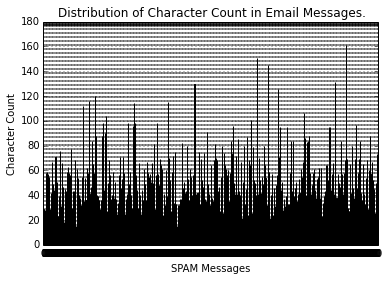

In [39]:
label = 0
trainMsgSpamHam = trainSubjects
trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, trainMsgSpamHam, YTrain)
PlotCharCountInMsg(trainMsgLabel, YTrainLabel, label)

### Plot Histogram for Email Subject Length of Ham

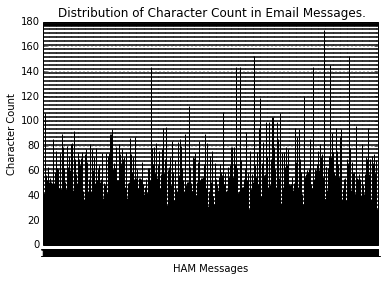

In [40]:
label = 1
trainMsgSpamHam = trainSubjects
trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, trainMsgSpamHam, YTrain)
PlotCharCountInMsg(trainMsgLabel, YTrainLabel, label)

### Plot Histogram for Email Body Length of Spam

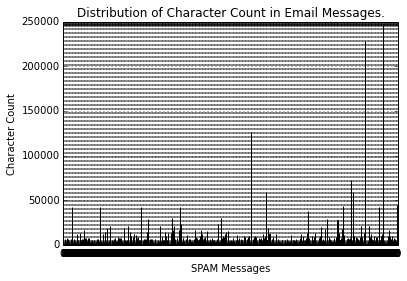

In [41]:
label = 0
trainMsgSpamHam = trainEmailBody
trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, trainMsgSpamHam, YTrain)
PlotCharCountInMsg(trainMsgLabel, YTrainLabel, label)

### Plot Histogram for Email Body Length of Ham

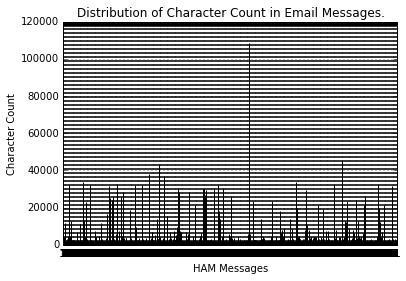

In [42]:
label = 1
trainMsgSpamHam = trainEmailBody
trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, trainMsgSpamHam, YTrain)
PlotCharCountInMsg(trainMsgLabel, YTrainLabel, label)

### Analyze Importance of Capital Letters in Spam Messages

In [43]:
def AnalyzeCapitalLettersInMsg(XMessages, minLetteredWord = 3):
    countCapitalsInMsg = []
    for msg in XMessages:
        countCapitals = 0
        if not msg is None:
            wordList = msg.split()
            for word in wordList:
                if word.isupper() and len(word) > minLetteredWord:
                    countCapitals += 1
    #                 print word, True
        countCapitalsInMsg.append(countCapitals)
    return np.array(countCapitalsInMsg).reshape(-1, 1)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCapitalCharCountInMsg(XMessages, YTrain, label, minLetteredWord):
    XMessagesLength = []
    
    trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, XMessages, YTrain)
    
    countCapitalsInMsg = AnalyzeCapitalLettersInMsg(trainMsgLabel, minLetteredWord)
    
    pos = np.arange(len(countCapitalsInMsg))
    width = 0.05     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(YTrainLabel)
    
    xlabelMsg = ''
    if label == 1:
        xlabelMsg = 'HAM Messages'
    elif label == 0:
        xlabelMsg = 'SPAM Messages'
        
    plt.xlabel(xlabelMsg)
    plt.ylabel('Character Count')
    plt.title('Distribution of Capital Letters in Email Messages.')
    plt.grid(True)

    plt.bar(pos, countCapitalsInMsg, width, color='b')
    plt.show()

### Distribution of Capital Letters in SPAM Email Subjects

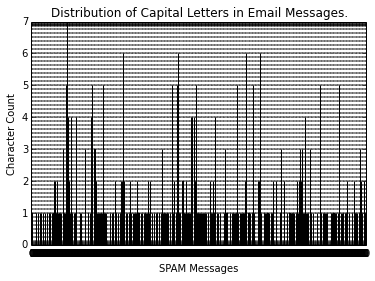

In [45]:
label = 0
minLetteredWord = 3
XTrainMsg = trainSubjects
PlotCapitalCharCountInMsg(XTrainMsg, YTrain, label, minLetteredWord)

### Distribution of Capital Letters in HAM Email Subjects

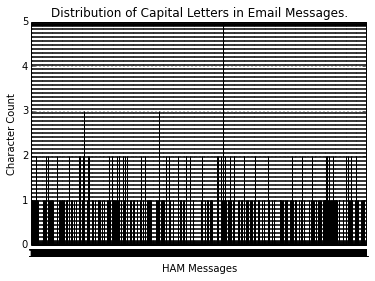

In [46]:
label = 1
minLetteredWord = 3
XTrainMsg = trainSubjects
PlotCapitalCharCountInMsg(XTrainMsg, YTrain, label, minLetteredWord)

### Distribution of Capital Letters in SPAM Email Body

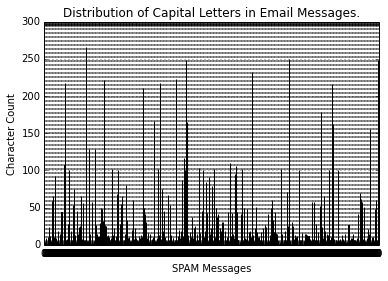

In [47]:
label = 0
minLetteredWord = 3
XTrainMsg = trainEmailBody
PlotCapitalCharCountInMsg(XTrainMsg, YTrain, label, minLetteredWord)

### Distribution of Capital Letters in HAM Email Body

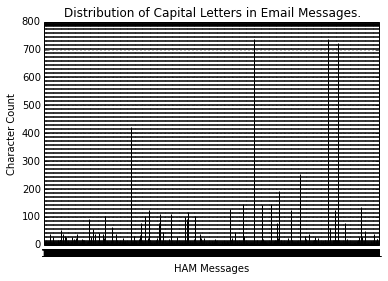

In [48]:
label = 1
minLetteredWord = 3
XTrainMsg = trainEmailBody
PlotCapitalCharCountInMsg(XTrainMsg, YTrain, label, minLetteredWord)

### Features based on the Presence/Absence of a particular substring in the message.

In [49]:
def ChkPresenceOfStringFeat(XMessages, strXContainsList):
    XSignFeature = []
    for msg in XMessages:
        countStrOccurence = 0
        if not msg is None:
            wordList = msg.split()
            for word in wordList:
                if word.lower() in strXContainsList:
                    countStrOccurence += 1
        
        XSignFeature.append(countStrOccurence)
    return np.array(XSignFeature).reshape(-1, 1)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotStrOccurenceCountInMsg(XMessages, YTrain, label, strSpamWordsList):
    
    trainMsgLabel, YTrainLabel = GetSpamHamMsgIdx(label, XMessages, YTrain)
    
    XSignFeature = ChkPresenceOfStringFeat(trainMsgLabel, strSpamWordsList)
    pos = np.arange(len(XSignFeature))
    width = 0.05     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    xTicksLbl = range(0, len(YTrainLabel))
    ax.set_xticklabels(xTicksLbl)
    
    xlabelMsg = ''
    if label == 1:
        xlabelMsg = 'HAM Messages'
    elif label == 0:
        xlabelMsg = 'SPAM Messages'
        
    plt.xlabel(xlabelMsg)
    plt.ylabel('String Occurence Count')
    plt.title('Distribution of Occurences of String in Email Messages.')
#     plt.grid(True)

    plt.bar(pos, XSignFeature, width, color='b')
    plt.show()

### Presence/Absence of PGP SIGNATURE in SPAM message subject as a feature

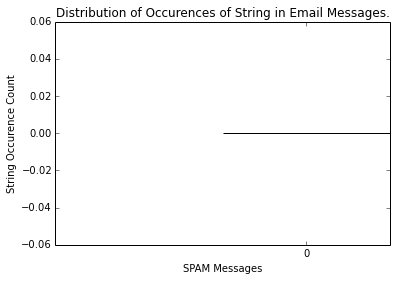

In [51]:
label = 0
XTrainMsg = trainSubjects
strSpamWordsList = ["pgp"]
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of PGP SIGNATURE in HAM message subject as a feature

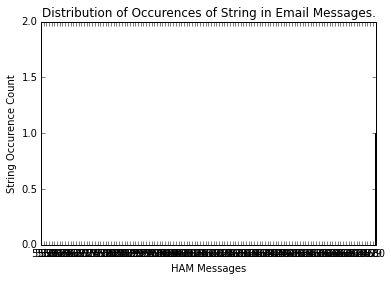

In [52]:
label = 1
XTrainMsg = trainSubjects
strSpamWordsList = ["pgp"]
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of PGP SIGNATURE in SPAM message body as a feature

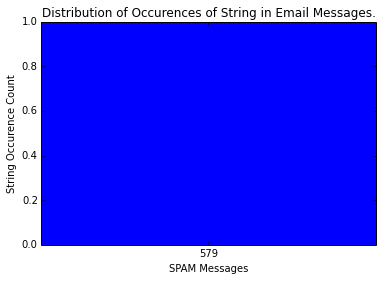

In [53]:
label = 0
XTrainMsg = trainEmailBody
strSpamWordsList = ["pgp"]
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of PGP SIGNATURE in HAM message body as a feature

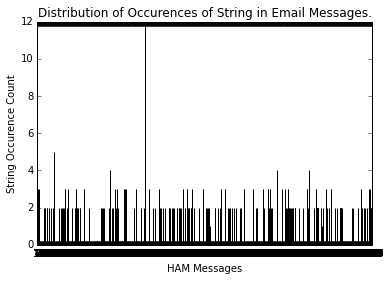

In [54]:
label = 1
XTrainMsg = trainEmailBody
strSpamWordsList = ["pgp"]
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

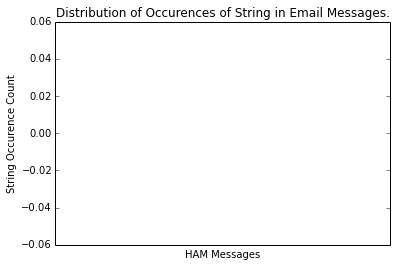

In [55]:
label = 1
XTrainMsg = trainEmailBody[2]
strSpamWordsList = ["pgp"]
PlotStrOccurenceCountInMsg(XTrainMsg, [1], label, strSpamWordsList)

### Presence/Absence of Words in the SPAM message subject as a feature

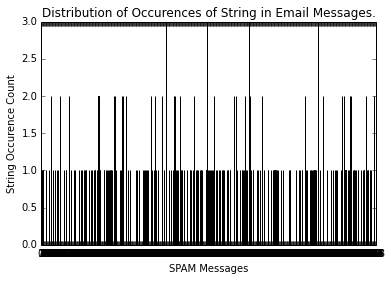

In [56]:
strSpamWordsList =  ["[spam]", "spam", "sex", "viagra", "money", "prize", "lottery", "jackpot", "replica"]
label = 0
XTrainMsg = trainSubjects
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of Words in the HAM message subject as a feature

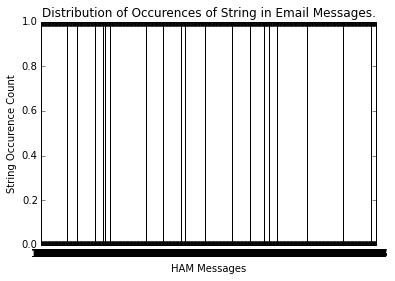

In [57]:
label = 1
XTrainMsg = trainSubjects
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of Words in the SPAM message body as a feature

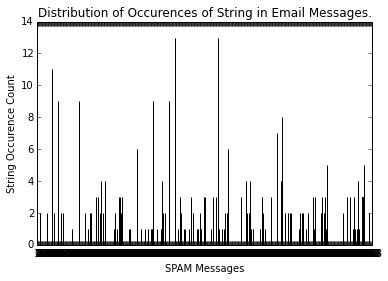

In [58]:
label = 0
XTrainMsg = trainEmailBody
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Presence/Absence of Words in the HAM message body as a feature

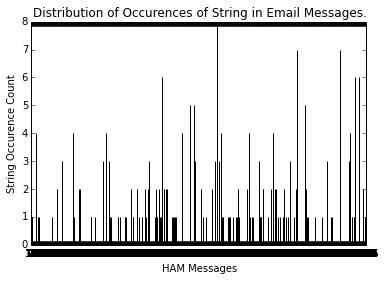

In [59]:
label = 1
XTrainMsg = trainEmailBody
PlotStrOccurenceCountInMsg(XTrainMsg, YTrain, label, strSpamWordsList)

### Use different classifiers to train the model.

### Naive Bayes Classifier on Email Subjects

In [60]:
#Naive Bayes Classifier
##http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifySpamHam(XTrain, XTest, YTrain, YTest, params, ruled):
#     print XTest.shape, XTrain.shape, YTrain.shape, YTest.shape
    folder = params['folder']
    fileString = params['fileString']
    threshold = params['threshold']
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
    XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
    SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
#     print len(SubjectWordsSpamicity)
#     print SubjectWordsSpamicity
#     for subject in XTrainSubjects:
#         spam,ham = computeSpamHamMetrics(subject)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    YPred = []
    for subject in XTestSubjects:
        spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
        spamminess = (1 + spam - ham)/2
        if spamminess > threshold:
            YPred.append(0)
        else:
            YPred.append(1)
#         if spam > ham:
#             YPred.append(0)
#         else:
#             YPred.append(1)
    YPred = np.array(YPred)
    diff = YPred - YTest
    score = diff[diff == 0].size/float(YPred.size)
#     print score, YPred
    if ruled:
        YPred = ApplyStaticRule1(XTestSubjects, YPred)
#         diff = YPred - YTest
#         score = diff[diff == 0].size/float(YPred.size)
#         print score, YPred
#     print YPred.shape
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)


### Naive Bayes Classifier on Email Body

In [61]:
# Naive Bayes Classifier
## http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifyBodySpamHam(XTrain, XTest, YTrain, YTest, params,ruled):
    folder = params['folder']
    fileString = params['fileString']
    XTrainBody = readEmailBody(XTrain, folder, fileString)
    XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
    BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)

    XTestBody = readEmailBody(XTest, folder, fileString)
    YPred = []
    for body in XTestBody:
        spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)
    if ruled:
        YPred = ApplyStaticRule2(XTestBody, YPred)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Naive Bayes Classifier on Email

In [120]:
# Naive Bayes Classifier
## http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifyCombinedSpamHam(XTrain, XTest, YTrain, YTest, params, ruled):
    folder = params['folder']
    fileString = params['fileString']
    XTrainBody = readEmailBody(XTrain, folder, fileString)
#     XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
#     BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
    XTestBody = readEmailBody(XTest, folder, fileString)
    
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
#     XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
#     SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    
    
#     testSender = readEmailField('Sender', XTest, folder, fileString)
    testSender = readEmailField('From', XTest, folder, fileString)
    XTestSender = CheckMissingSender(testSender)
    testDate = readEmailField('Date', XTest, folder, fileString)
    XTestDate = getDates(testDate)
    
    
    XTrainFeatures = []
    XTestFeatures = []
    for i in xrange(len(XTrainBody)):
        if XTrainSubjects[i] and XTrainBody[i]:
            XTrainFeatures.append(XTrainSubjects[i]+XTrainBody[i])
        elif XTrainSubjects[i]:
            XTrainFeatures.append(XTrainSubjects[i])
        elif XTrainBody[i]:
            XTrainFeatures.append(XTrainBody[i])
        
    for i in xrange(len(XTestBody)):
        if XTestSubjects[i] and XTestBody[i]:
            XTestFeatures.append(XTestSubjects[i]+XTestBody[i])   
        elif XTestSubjects[i]:
            XTestFeatures.append(XTestSubjects[i])   
        elif XTestBody[i]:
            XTestFeatures.append(XTestBody[i])   
    
    XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(XTrainFeatures, YTrain)
    XWordsSpamicity = computeSpamicityWords(XFeaturesSpam, XFeaturesHam)
   
    YPred = []
#     for i in xrange(len(XTestBody)):
#         body = XTestBody[i]
#         subject = XTestSubjects[i]
#         spamB, hamB = computeSpamHamMetrics(body,BodyWordsSpamicity)
#         spamS, hamS = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
#         spam = spamB * spamS
#         ham = hamB * hamS
    for test in XTestFeatures:
        spam, ham = computeSpamHamMetrics(test, XWordsSpamicity)
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)
    if ruled:
        rules = params['rules']
#         if 1 in rules:
#             YPred = ApplyStaticRule1(XTestSubjects, YPred)
#         if 2 in rules:
#             YPred = ApplyStaticRule2(XTestBody, YPred)
#         if 3 in rules:
#             YPred = ApplyStaticRule3(XTestDate, YPred)
#         if 4 in rules:
#             YPred = ApplyStaticRule4(XTestSender, YPred)
#         if 5 in rules:
#             YPred = ApplyStaticRule5(XTestBody, YPred)

        for r in rules:
            if r==1:
                YPred = ApplyStaticRule1(XTestSubjects, YPred)
            elif r==2:
                YPred = ApplyStaticRule2(XTestBody, YPred)
            elif r==3:
                YPred = ApplyStaticRule3(XTestDate, YPred)
            elif r==4:
                YPred = ApplyStaticRule4(XTestSender, YPred)
            elif r==5:
                YPred = ApplyStaticRule5(XTestBody, YPred)

    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [122]:
# Naive Bayes Classifier
## http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifyCombinedTopSpamHam(XTrain, XTest, YTrain, YTest, params, ruled):
    folder = params['folder']
    fileString = params['fileString']
    XTrainBody = readEmailBody(XTrain, folder, fileString)
#     XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
#     BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
    XTestBody = readEmailBody(XTest, folder, fileString)
    
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
#     XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
#     SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    
    
#     testSender = readEmailField('Sender', XTest, folder, fileString)
    testSender = readEmailField('From', XTest, folder, fileString)
    XTestSender = CheckMissingSender(testSender)
    testDate = readEmailField('Date', XTest, folder, fileString)
    XTestDate = getDates(testDate)
    
    
    XTrainFeatures = []
    XTestFeatures = []
    for i in xrange(len(XTrainBody)):
        if XTrainSubjects[i] and XTrainBody[i]:
            XTrainFeatures.append(XTrainSubjects[i]+XTrainBody[i])
        elif XTrainSubjects[i]:
            XTrainFeatures.append(XTrainSubjects[i])
        elif XTrainBody[i]:
            XTrainFeatures.append(XTrainBody[i])
        
    for i in xrange(len(XTestBody)):
        if XTestSubjects[i] and XTestBody[i]:
            XTestFeatures.append(XTestSubjects[i]+XTestBody[i])   
        elif XTestSubjects[i]:
            XTestFeatures.append(XTestSubjects[i])   
        elif XTestBody[i]:
            XTestFeatures.append(XTestBody[i])   
    
    XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(XTrainFeatures, YTrain)
    XWordsSpamicity = computeSpamicityWords(XFeaturesSpam, XFeaturesHam)
   
    YPred = []
#     for i in xrange(len(XTestBody)):
#         body = XTestBody[i]
#         subject = XTestSubjects[i]
#         spamB, hamB = computeSpamHamMetrics(body,BodyWordsSpamicity)
#         spamS, hamS = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
#         spam = spamB * spamS
#         ham = hamB * hamS
    for test in XTestFeatures:
        spam, ham = computeTopSpamHamMetrics(test, XWordsSpamicity)
#         print spam, ham
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)
    if ruled:
        rules = params['rules']
#         if 1 in rules:
#             YPred = ApplyStaticRule1(XTestSubjects, YPred)
#         if 2 in rules:
#             YPred = ApplyStaticRule2(XTestBody, YPred)
#         if 3 in rules:
#             YPred = ApplyStaticRule3(XTestDate, YPred)
#         if 4 in rules:
#             YPred = ApplyStaticRule4(XTestSender, YPred)
#         if 5 in rules:
#             YPred = ApplyStaticRule5(XTestBody, YPred)

        for r in rules:
            if r==1:
                YPred = ApplyStaticRule1(XTestSubjects, YPred)
            elif r==2:
                YPred = ApplyStaticRule2(XTestBody, YPred)
            elif r==3:
                YPred = ApplyStaticRule3(XTestDate, YPred)
            elif r==4:
                YPred = ApplyStaticRule4(XTestSender, YPred)
            elif r==5:
                YPred = ApplyStaticRule5(XTestBody, YPred)

    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [63]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest, params, ruled):
    trees = params['trees']
    crit = params['criterion']
    seed = params['random_state']
    clf = RandomForestClassifier(n_estimators=trees,criterion=crit, random_state=seed )
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    if ruled:
        
        XTestSubjects = params['test_subs']
        XTestBody = params['test_email_body']
        XTestSender = params['test_sender']
        XTestDate = params['test_date']
        
        rules = params['rules']
        for r in rules:
            if r==1:
                YPred = ApplyStaticRule1(XTestSubjects, YPred)
            elif r==2:
                YPred = ApplyStaticRule2(XTestBody, YPred)
            elif r==3:
                YPred = ApplyStaticRule3(XTestDate, YPred)
            elif r==4:
                YPred = ApplyStaticRule4(XTestSender, YPred)
            elif r==5:
                YPred = ApplyStaticRule5(XTestBody, YPred)

    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [64]:
# K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest, params, ruled):
    neighbours = params['neighbours']
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    if ruled:
        folder = testFolder
        fileString = 'TEST_'
        XTestSubjects = readSubjects(XTest, folder, fileString)
        XTestBody = readEmailBody(XTest, folder, fileString)
        YPred = ApplyStaticRule1(XTestSubjects, YPred)
        YPred = ApplyStaticRule2(XTestBody, YPred)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [65]:
import pyvw
def classifyVW(XTrain, XTest, YTrain, YTest, XTestSubs, XTestEmailBody, XTestSender, XTestDate, params, ruled):
    parameters = params['parameters']
    vw = pyvw.vw(parameters)
    for train in XTrain:
        ex = vw.example(str(train[0]) + " | " + train[1])
        ex.learn()
    YPred = []
    for test in XTest:
        ex1 = vw.example(" | " + test[1])
        ex1.learn() 
    #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
        if ex1.get_simplelabel_prediction() > 0:
            YPred.append(1)
        else:
            YPred.append(0)
    if ruled:
        rules = params['rules']
#         if 1 in rules:
#             YPred = ApplyStaticRule1(XTestSubs, YPred)
#         if 2 in rules:
#             YPred = ApplyStaticRule2(XTestEmailBody, YPred)
#         if 3 in rules:
#             YPred = ApplyStaticRule3(XTestDate, YPred)
#         if 4 in rules:
#             YPred = ApplyStaticRule4(XTestSender, YPred)
#         if 5 in rules:
#             YPred = ApplyStaticRule5(XTestEmailBody, YPred)

        for r in rules:
            if r==1:
                YPred = ApplyStaticRule1(XTestSubs, YPred)
            elif r==2:
                YPred = ApplyStaticRule2(XTestEmailBody, YPred)
            elif r==3:
                YPred = ApplyStaticRule3(XTestDate, YPred)
            elif r==4:
                YPred = ApplyStaticRule4(XTestSender, YPred)
            elif r==5:
                YPred = ApplyStaticRule5(XTestEmailBody, YPred)

#     return YPred
    YPred = np.array(YPred)
    YTest = np.array(YTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)


In [66]:
def ApplyStaticRule1(XTestSub, YPred):
    ## Rule 1 : If the word SPAM is present, it is SPAM Message
    strSpamWordsList = ["[spam]"]
    # Check for all the spam words, of which we are sure about.
#      strSpamWordsList =  ["[spam]", "spam", "sex", "viagra", "money", "prize", "lottery", "jackpot", "replica", "friend", "free"]
    
    XTestSubFeatures = ChkPresenceOfStringFeat(XTestSub, strSpamWordsList)
    idxSPAMPresent = np.where(XTestSubFeatures>0)[0]
#         print len(YPred)
#         print len(idxSPAMPresent)
    count = 0
    for idx in idxSPAMPresent:
        if YPred[idx] == 1:
            count +=1
        YPred[idx] = 0

#     print "spam replaced:", count
    return YPred
    

In [67]:
def ApplyStaticRule2(XTestBody, YPred):
    ## Rule 2 : If PGP Signature is present, it is HAM Message
    strXContainsList = ["pgp"]
    XTestBodyFeatures = ChkPresenceOfStringFeat(XTestBody, strXContainsList)
    idxPGPPresent = np.where(XTestBodyFeatures>0)[0]
#         print len(YPred)
#         print len(idxPGPPresent)
    count = 0
    for idx in idxPGPPresent:
        if YPred[idx] == 0:
            count +=1
        YPred[idx] = 1

#     print "pgp replaced", count
    return YPred
#     writePredictedLabelFile(YPred)

In [68]:
def ApplyStaticRule3(XTest, YPred):
    ## Rule 3 : If date of the email is in the future, then it is a SPAM.
    XTestFeatures = CheckFutureDate(XTest)
    XTestFeatures = np.array(XTestFeatures)
    idxSPAMPresent = []
    idx = 0
    for i in XTestFeatures:
        if i == False:
            idxSPAMPresent.append(idx)
        idx+=1
    count = 0
    for idx in idxSPAMPresent:
        if YPred[idx] == 1:
            count +=1
        YPred[idx] = 0

#     print "spam replaced:", count
    return YPred

In [69]:
def ApplyStaticRule4(XTest, YPred):
    ## Rule 4 : If there is a missing sender field, it is a SPAM.
    XTestFeatures = CheckMissingSender(XTest)
    XTestFeatures = np.array(XTestFeatures)
    idxSPAMPresent = []
    idx = 0
    for i in XTestFeatures:
        if i == True:
            idxSPAMPresent.append(idx)
        idx+=1
    count = 0
    for idx in idxSPAMPresent:
        if YPred[idx] == 1:
            count +=1
        YPred[idx] = 0

#     print "spam replaced:", count
    return YPred

In [70]:
def ApplyStaticRule5(XTest, YPred):
    ## Rule 5 : If the email contains words with all capital letters above a threshold, then it is a SPAM.
    minCapitalWords = 15
    minLetteredWord = 3
    XTestFeatures = AnalyzeCapitalLettersInMsg(XTest, minLetteredWord)
    XTestFeatures = np.array(XTestFeatures)
    
    idxSPAMPresent = []
    idx = 0
    for i in XTestFeatures:
        if i >= minCapitalWords:
            idxSPAMPresent.append(idx)
        idx+=1
    
    count = 0
    for idx in idxSPAMPresent:
        if YPred[idx] == 1:
            count +=1
        YPred[idx] = 0

#     print "spam replaced:", count
    return YPred

### Stratified K Fold Cross Validation

In [123]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify, params, ruled):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    
    XTrainFileNames = params['FileNames']
    fileString = 'TRAIN_'
    XTestEmailBody = readEmailBody(XTrainFileNames, trainFolder, fileString)
    XTestSubs = readSubjects(XTrainFileNames, trainFolder, fileString)
    
#     testSender = readEmailField('Sender', XTrainFileNames, trainFolder, fileString)
    testSender = readEmailField('From', XTrainFileNames, trainFolder, fileString)
    XTestSender = CheckMissingSender(testSender)
    testDate = readEmailField('Date', XTrainFileNames, trainFolder, fileString)
    XTestDate = getDates(testDate)
    
    
    for train_index, test_index in skf:
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        
        x_test_subs, x_test_email_body = [XTestSubs[i] for i in test_index], [XTestEmailBody[i] for i in test_index]
        x_test_sender, x_test_date  = [XTestSender[i] for i in test_index], [XTestDate[i] for i in test_index]
        
        params['test_subs'] = x_test_subs
        params['test_email_body'] = x_test_email_body
        params['test_sender'] = x_test_sender
        params['test_date'] = x_test_date  
        
        score += classify(X_train, X_test,  y_train, y_test, params, ruled)
    return score/n_folds

In [72]:
from sklearn.cross_validation import StratifiedKFold
def VWstratifiedKFoldVal(XTrain, YTrain, XTestSubs, XTestEmailBody, XTestSender, XTestDate, classify, params, ruled):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
#     print skf
    for train_index, test_index in skf:
#         print type(train_index), type(test_index), len(train_index), len(test_index)
        X_train, X_test = [XTrain[i] for i in train_index], [XTrain[i] for i in test_index]
        y_train, y_test = [YTrain[i] for i in train_index], [YTrain[i] for i in test_index]
        x_test_subs, x_test_email_body = [XTestSubs[i][-1] for i in test_index], [XTestEmailBody[i][-1] for i in test_index]
        x_test_sender, x_test_date  = [XTestSender[i] for i in test_index], [XTestDate[i] for i in test_index]
        
        score += classify(X_train, X_test,  y_train, y_test, x_test_subs, x_test_email_body, x_test_sender, x_test_date, params, ruled)
    return score/n_folds

### Write Predicted Output Labels to File

In [73]:
def writePredictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Prediction" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i+1) + "," + str(int(YPred[i]))+ "\n")
    f.close()

### Classifier on Email Subject

In [74]:
params = {'folder':trainFolder,'fileString':'TRAIN_','threshold':0.5, 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifySpamHam, params, ruled=False)
print score
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifySpamHam, params, ruled=True)
print score

87.3623792095
87.9619001676


In [75]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for subject in XTestSubjects:
    spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

### Classifier on Email Body

In [76]:
params = {'folder':trainFolder,'fileString':'TRAIN_','FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyBodySpamHam, params, ruled=False)
print score
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyBodySpamHam, params, ruled=True)
print score

65.2402633611
68.2800286401


In [77]:
XTrainBody = readEmailBody(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
XTestBody = readEmailBody(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for body in XTestBody:
    spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

### Classifier on Email Body & Message

In [78]:
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = False)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[1], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[2], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[3], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[4], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[5], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[1,2,3,4,5], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params, ruled = True)
print score

65.1997833591
65.2798635195
68.1996284785
65.3197833591
65.1997833591
62.6396983988
65.4797830391


In [112]:
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = False)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[1], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[2], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[3], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[4], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[5], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[1,2,3,4,5], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score

68.9999503998
77.3205233621
68.9599503998
69.9597118388
68.9998705595
71.1997124788
78.4000433602


In [117]:
params = {'folder':trainFolder,'fileString':'TRAIN_', 'rules':[1,2,3], 'FileNames':XTrainFileNames}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedTopSpamHam, params, ruled = True)
print score

77.8805236821


In [79]:
XTrainBody = readEmailBody(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
XTestBody = readEmailBody(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for body in XTestBody:
    spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

In [126]:
testSubjects = readSubjects(XTestFileNames, testFolder, 'TEST_')
testEmailBody = readEmailBody(XTestFileNames, testFolder, 'TEST_')
trainSubjects = readSubjects(XTrainFileNames, trainFolder, 'TRAIN_')
trainEmailBody = readEmailBody(XTrainFileNames, trainFolder, 'TRAIN_')

# trainSender = readEmailField('Sender', XTrainFileNames, trainFolder, 'TRAIN_')
trainSender = readEmailField('From', XTrainFileNames, trainFolder, 'TRAIN_')
XTrainSender = CheckMissingSender(trainSender)
# testSender = readEmailField('Sender', XTestFileNames, testFolder, 'TEST_')
testSender = readEmailField('From', XTestFileNames, testFolder, 'TEST_')
XTestSender = CheckMissingSender(testSender)

trainDate = readEmailField('Date', XTrainFileNames, trainFolder, 'TRAIN_')
XTrainDate = getDates(trainDate)
testDate = readEmailField('Date', XTestFileNames, testFolder, 'TEST_')
XTestDate = getDates(testDate)

trainEmails = readEmails(XTrainFileNames, trainFolder, 'TRAIN_')
testEmails = readEmails(XTestFileNames, testFolder, 'TEST_')

In [81]:
def cleanVWMessages(XMessages, YTrain, train=False):
    # f = open('trainSubjects.txt','wb')
    cleanVW = []
    Y = 0
    for i in xrange(len(XMessages)):
        if train:
            if YTrain[i] == 0:
                Y = -1
            else:
                Y = 1
        if XMessages[i]:
            cleanVW.append((Y,''.join(c for c in XMessages[i] if c not in ':|\n\t\r')))
            #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
        else:
            cleanVW.append((Y,''))
            #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
    # f.close()
    print len(cleanVW)
    return cleanVW
#     print trainVW[0]

In [82]:
def cleanVWCombinedMessage(XMessageSubject, XMessageBody, YTrain, train=False):
    # f = open('trainSubjects.txt','wb')
    cleanVW = []
    Y = 0        
    for i in xrange(len(XMessageBody)):
        if train:
            if YTrain[i] == 0:
                Y = -1
            else:
                Y = 1
        if XMessageBody[i] and XMessageSubject[i]:
            vector = ''.join(c for c in XMessageSubject[i] if c not in ':|\n\t\r') + ' ' + ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')
        elif XMessageSubject[i]:
            vector = ''.join(c for c in XMessageSubject[i] if c not in ':|\n\t\r')
        elif XMessageBody[i]:
            vector = ''.join(c for c in XMessageBody[i] if c not in ':|\n\t\r')
        else:
            train = ''
        cleanVW.append((Y,vector))   
    #     trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
    #         #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    #     else:
    #         trainVW.append((Y,''))
            #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
    # f.close()
    return cleanVW
#     print len(cleanVW)
#     print cleanVW[0]

In [83]:
cleanVWTrainSub = cleanVWMessages(trainSubjects, YTrain, train=True)
cleanVWTrainBody = cleanVWMessages(trainEmailBody, YTrain, train=True)
cleanVWTestSub = cleanVWMessages(testSubjects, YTrain, train=False)
cleanVWTestBody = cleanVWMessages(testEmailBody, YTrain, train=False)
cleanVWTrainCombined = cleanVWCombinedMessage(trainSubjects, trainEmailBody, YTrain, train=True)
cleanVWTestCombined = cleanVWCombinedMessage(testSubjects, testEmailBody, YTrain, train=False)
cleanVWTrainEmails = cleanVWMessages(trainEmails, YTrain, train=True)
cleanVWTestEmails = cleanVWMessages(testEmails, YTrain, train=False)
# for i in xrange(len(cleanVWTrainSub)):
#     cleanVWTrainCombined.append(cleanVWTrainSub[i] + ' ' + cleanVWTrainBody[i])
# print len(cleanVWTrainCombined)
# for i in xrange(len(cleanVWTestSub)):
#     cleanVWTestCombined.append(cleanVWTestSub[i] + ' ' + cleanVWTestBody[i])
# print len(cleanVWTestCombined)

2500
2500
1827
1827
2500
1827


In [127]:
p = ''
params = {'parameters':p}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=False)
params = {'parameters':p,'rules':[1]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[2]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[3]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[4]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[5]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[1,2,3,4,5]}
print VWstratifiedKFoldVal(cleanVWTrainSub, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

92.1605476822
92.1605476822
92.2405476822
92.2805476822
92.1605476822
90.2408641635
90.2808641635


In [85]:
p = ''
params = {'parameters':p}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=False)
params = {'parameters':p,'rules':[1]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[2]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[3]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[4]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[5]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[1,2,3,4,5]}
print VWstratifiedKFoldVal(cleanVWTrainBody, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

96.4405547222
97.0408753635
96.5204748819
96.6405550422
96.4405547222
93.2010289641
94.0812700851


In [128]:
p = ''
print len(cleanVWTrainCombined)
params = {'parameters':p}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=False)
params = {'parameters':p,'rules':[1]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[2]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[3]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[4]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[5]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[1,2,3,4,5]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

2500
97.5607156829
97.6007958432
97.6406358425
97.6807958432
97.5607156829
94.3211899248
94.5612704051


In [90]:
params = {'parameters':'','rules':[1,2,3]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

97.8007961632


In [91]:
params = {'parameters':'','rules':[2]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

97.6406358425


In [92]:
params = {'parameters':'','rules':[3]}
print VWstratifiedKFoldVal(cleanVWTrainCombined, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

97.6807958432


In [129]:
print len(cleanVWTrainEmails)
p = ''
# p = "--ngram 2 --adaptive --loss_function=logistic --link=logistic"
# p = "--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048"
params = {'parameters':p}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=False)
params = {'parameters':p,'rules':[1]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[2]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[3]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[4]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[5]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[1,2,3,4,5]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

2500
98.8003184013
98.8003184013
98.800238561
98.8003184013
98.8003184013
95.3207926432
95.3607128029


In [101]:
params = {'parameters':p,'rules':[1,2,3]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[1,2]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)
params = {'parameters':p,'rules':[2,3]}
print VWstratifiedKFoldVal(cleanVWTrainEmails, YTrain, cleanVWTrainSub, cleanVWTrainBody, XTrainSender, XTrainDate, classifyVW, params, ruled=True)

98.800238561
98.800238561
98.800238561


In [243]:
# import pyvw
# # vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# # vw = pyvw.vw("--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048")
# # vw = pyvw.vw("--loss_function=logistic --link=logistic")
# vw = pyvw.vw()
# # vw = pyvw.VWClassifier()
# for train in cleanVWTrainCombined:
#     ex = vw.example(str(train[0]) + " | " + train[1])
#     ex.learn()
# YPred = []
# for test in cleanVWTestCombined:
#     ex1 = vw.example(" | " + test[1])
#     ex1.learn() 
# #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
#     if ex1.get_simplelabel_prediction() > 0:
#         YPred.append(1)
#     else:
#         YPred.append(0)

# print len(YPred)
# # YPred = ApplyStaticRule1(testSubjects, YPred)
# # YPred = ApplyStaticRule2(testEmailBody, YPred)
# # YPred = ApplyStaticRule3(XTestDate, YPred)
# writePredictedLabelFile(YPred)


# #     YPred = 
# #     test = vw.example(" | This is certainly ham.")
# #     test.learn() 
# # print test.get_updated_prediction() #<-- usually 0.0
# # print test.get_simplelabel_prediction() #<-- the same for every prediction? 

### Create Features based on Email message type for Random Forests.

In [86]:
def createFeaturesMsgTypeRF(readMsgType, createFeature, rules = [1,2,3], ruled= True):
    XTrainSubjects = readMsgType(XTrainFileNames, trainFolder, fileString='TRAIN_')
    XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
    SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
    XTrainSubjectFeatures = createFeature(XTrainSubjects, SubjectWordsSpamicity)
#     print XTrainSubjectFeatures.shape
#     print XTrainSubjectFeatures[:5]


    params = {'trees':200, 'criterion':'entropy', 'random_state':None, 'rules':rules, 'FileNames':XTrainFileNames}
    score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyRandomForestClassifier, params, ruled)
    print score

    XTestSubjects = readMsgType(XTestFileNames, testFolder, fileString='TEST_')
    XTestSubjectFeatures = createFeature(XTestSubjects, SubjectWordsSpamicity)
#     print XTestSubjectFeatures.shape
#     print XTestSubjectFeatures[:5]

    clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
    clf.fit(XTrainSubjectFeatures, YTrain)
    YPred = clf.predict(XTestSubjectFeatures)
    writePredictedLabelFile(YPred)
    return XTrainSubjectFeatures, XTestSubjectFeatures

### Create Spam Ham Features based on Email Subject for Random Forests.

In [87]:
XTrainSubjectFeatures, XTestSubjectFeatures = createFeaturesMsgTypeRF(readSubjects, createSpamHamFeature)
XTrainSubjectFeatures, XTestSubjectFeatures = createFeaturesMsgTypeRF(readSubjects, createSpamHamFeature, [], False)

94.7949463798
94.1144644579


### Create Spam Ham Features based on Email Body for Random Forests.

In [88]:
XTrainBodyFeatures, XTestBodyFeatures = createFeaturesMsgTypeRF(readEmailBody, createSpamHamFeature,[1,2,3], True)
XTrainBodyFeatures, XTestBodyFeatures = createFeaturesMsgTypeRF(readEmailBody, createSpamHamFeature,[1,2,3], False)

79.921247045
71.8008347233


### Create Spam Ham Features based on both Email Subject and Body for Random Forests.

In [261]:
def concatenatedFeaturesRF(XTrainSubjectFeatures, XTrainBodyFeatures, XTestSubjectFeatures, XTestBodyFeatures, rules = [1,2,3], ruled=True):
    XTrainConcatenatedFeatures = np.hstack((XTrainSubjectFeatures, XTrainBodyFeatures))
    params = {'trees':200, 'criterion':'entropy', 'random_state':None, 'rules':rules, 'FileNames':XTrainFileNames}
    score = stratifiedKFoldVal(XTrainConcatenatedFeatures, YTrain, classifyRandomForestClassifier, params, ruled)
    print score
    
    XTestConcatenatedFeatures = np.hstack((XTestSubjectFeatures, XTestBodyFeatures))
    clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
    clf.fit(XTrainConcatenatedFeatures, YTrain)
    YPred = clf.predict(XTestConcatenatedFeatures)
    writePredictedLabelFile(YPred)
    return YPred

In [262]:
concatenatedFeaturesRF(XTrainSubjectFeatures, XTrainBodyFeatures, XTestSubjectFeatures, XTestBodyFeatures, [1,2,3], True)
concatenatedFeaturesRF(XTrainSubjectFeatures, XTrainBodyFeatures, XTestSubjectFeatures, XTestBodyFeatures, [1,2,3], False)

95.3151067004
94.6747049388


array([1, 1, 1, ..., 0, 0, 0])

### Create features based on Capital Letters, SPAM words & PGP Signature occurences in email messages.

In [268]:
def createWordFeatures(readMsgType, createFeature, param):
    XMessages = readMsgType(XTrainFileNames, trainFolder, fileString='TRAIN_')
    XFeatures = createFeature(XMessages, param)
    
    XTestMessages = readMsgType(XTestFileNames, testFolder, fileString='TEST_')
    XTestFeatures = createFeature(XTestMessages, param)

    return XFeatures, XTestFeatures

In [269]:
minLetteredWord = 3
XTrainSubCapWordFeatures, XTestSubCapWordFeatures = createWordFeatures(readSubjects, AnalyzeCapitalLettersInMsg, minLetteredWord)
XTrainBodyCapWordFeatures, XTestBodyCapWordFeatures = createWordFeatures(readEmailBody, AnalyzeCapitalLettersInMsg, minLetteredWord)

XTrainCapWordConcFeatures = np.hstack((XTrainSubCapWordFeatures, XTrainBodyCapWordFeatures))
XTestCapWordConcFeatures = np.hstack((XTestSubCapWordFeatures, XTestBodyCapWordFeatures))


In [273]:
XTrainSubSpamWordsFeatures, XTestSubSpamWordsFeatures = createWordFeatures(readSubjects, ChkPresenceOfStringFeat, strSpamWordsList)
XTrainBodySpamWordsFeatures, XTestBodySpamWordsFeatures = createWordFeatures(readEmailBody, ChkPresenceOfStringFeat, strSpamWordsList)

XTrainSpamWordsConcFeatures = np.hstack((XTrainSubSpamWordsFeatures, XTrainBodySpamWordsFeatures))
XTestSpamWordsConcFeatures = np.hstack((XTestSubSpamWordsFeatures, XTestBodySpamWordsFeatures))

In [274]:
strPGPSignatureList = ["pgp"]

XTrainSubPGPSignFeatures, XTestSubPGPSignFeatures = createWordFeatures(readSubjects, ChkPresenceOfStringFeat, strPGPSignatureList)
XTrainBodyPGPSignFeatures, XTestBodyPGPSignFeatures = createWordFeatures(readEmailBody, ChkPresenceOfStringFeat, strPGPSignatureList)

XTrainPGPSignConcFeatures = np.hstack((XTrainSubPGPSignFeatures, XTrainBodyPGPSignFeatures))
XTestPGPSignConcFeatures = np.hstack((XTestSubPGPSignFeatures, XTestBodyPGPSignFeatures))

In [275]:
XTrainWordsConcFeatures = np.hstack((XTrainCapWordConcFeatures, XTrainSpamWordsConcFeatures))
XTestWordsConcFeatures = np.hstack((XTestCapWordConcFeatures, XTestSpamWordsConcFeatures))

XTrainConcFeatures = np.hstack((XTrainPGPSignConcFeatures, XTrainWordsConcFeatures))
XTestConcFeatures = np.hstack((XTestPGPSignConcFeatures, XTestWordsConcFeatures))

### Random Forest on Capital Letters, SPAM words & PGP Signature occurences on both email subject and body

In [276]:
concatenatedFeaturesRF(XTrainPGPSignConcFeatures, XTrainWordsConcFeatures, XTestPGPSignConcFeatures, XTestWordsConcFeatures,[1,2,3], True)
concatenatedFeaturesRF(XTrainPGPSignConcFeatures, XTrainWordsConcFeatures, XTestPGPSignConcFeatures, XTestWordsConcFeatures,[1,2,3], False)

81.9199689599
81.6398884796


array([1, 1, 0, ..., 1, 1, 0])

### Create Ratio of Spam words as Features based on Email Subject for Random Forests.

In [277]:
XTrainSubjectFeatures1, XTestSubjectFeatures1 = createFeaturesMsgTypeRF(readSubjects, createSpamWordRatioFeature, [1,2,3], True)
XTrainSubjectFeatures1, XTestSubjectFeatures1 = createFeaturesMsgTypeRF(readSubjects, createSpamWordRatioFeature, [1,2,3], False)

95.8748674995
95.0336647747


### Create Ratio of Spam words as Features based on Email Body for Random Forests.

In [278]:
XTrainBodyFeatures1, XTestBodyFeatures1 = createFeaturesMsgTypeRF(readEmailBody, createSpamWordRatioFeature, [1,2,3], True)
XTrainBodyFeatures1, XTestBodyFeatures1 = createFeaturesMsgTypeRF(readEmailBody, createSpamWordRatioFeature, [1,2,3], False)

99.0401584006
98.720237921


### Create Ratio of Spam words as Features based on both Email Subject and Body for Random Forests.

In [279]:
concatenatedFeaturesRF(XTrainSubjectFeatures1, XTrainBodyFeatures1, XTestSubjectFeatures1, XTestBodyFeatures1, [1,2,3], True)
concatenatedFeaturesRF(XTrainSubjectFeatures1, XTrainBodyFeatures1, XTestSubjectFeatures1, XTestBodyFeatures1, [1,2,3], False)

99.3192782371
99.3191179165


array([1, 1, 1, ..., 0, 0, 0])

### All features i.e. Ratio of Spam words, Capital Letters, SPAM words & PGP Signature occurences on both email subject and body

In [280]:
XTrainRatioSpamWordsFeatures = np.hstack((XTrainSubjectFeatures1, XTrainBodyFeatures1))
XTestRatioSpamWordsFeatures = np.hstack((XTestSubjectFeatures1, XTestBodyFeatures1))

XTrainAllFeatures = np.hstack((XTrainRatioSpamWordsFeatures, XTrainConcFeatures))
XTestAllFeatures = np.hstack((XTestRatioSpamWordsFeatures, XTestConcFeatures))

### Random Forest on All features

In [281]:
concatenatedFeaturesRF(XTrainRatioSpamWordsFeatures, XTrainConcFeatures, XTestRatioSpamWordsFeatures, XTestConcFeatures, [1,2,3], True)
concatenatedFeaturesRF(XTrainRatioSpamWordsFeatures, XTrainConcFeatures, XTestRatioSpamWordsFeatures, XTestConcFeatures, [1,2,3], False)

99.3994385578
99.4394382378


array([1, 1, 1, ..., 0, 0, 0])

### Apply static rules after Random Forest on features.

In [282]:
YPred = concatenatedFeaturesRF(XTrainSubjectFeatures1, XTrainBodyFeatures1, XTestSubjectFeatures1, XTestBodyFeatures1, [1,2,3], True)
YPred = concatenatedFeaturesRF(XTrainSubjectFeatures1, XTrainBodyFeatures1, XTestSubjectFeatures1, XTestBodyFeatures1, [1,2,3], False)

99.3192782371
99.3191980768


In [284]:
# XTestSub = readSubjects(XTestFileNames, testFolder, "TEST_")
# XTestBody = readEmailBody(XTestFileNames, testFolder, "TEST_")

# StaticRules(XTestSub, XTestBody, YPred)


### Selection of Nearest Neighbours for KNN

In [ ]:
XTrainFeatures = XTrainConcatenatedFeatures
newYTrain = YTrain
selectNeighbourScores = []

params = {'neighbours':2}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':4}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':10}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':18}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':20}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':22}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

print selectNeighbourScores

### Features based on Email Subject for kNN Classifier.

In [ ]:
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyKNNClassifier, params, ruled=False)
print score
score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyKNNClassifier, params, ruled=True)
print score

In [ ]:
neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainSubjectFeatures, YTrain).predict(XTestSubjectFeatures)
writePredictedLabelFile(YPred)

### Features based on Email Body for kNN Classifier.

In [ ]:
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainBodyFeatures, YTrain, classifyKNNClassifier, params)
print score

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainBodyFeatures, YTrain).predict(XTestBodyFeatures)
writePredictedLabelFile(YPred)

### Features based on both Email Subject and Body for kNN Classifier.

In [ ]:
XTrainConcatenatedFeatures = np.hstack((XTrainSubjectFeatures, XTrainBodyFeatures))
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainConcatenatedFeatures, YTrain, classifyKNNClassifier, params)
print score
print XTrainConcatenatedFeatures.shape

XTestConcatenatedFeatures = np.hstack((XTestSubjectFeatures, XTestBodyFeatures))

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainConcatenatedFeatures, YTrain).predict(XTestConcatenatedFeatures)
writePredictedLabelFile(YPred)

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectNeighbourScores, label = "Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.title("Neighbors in k-Nearest Neighbor (kNN) Classifier")

labels = [2,3,4,5,10,18,20,21,22]
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')
# plt.title("Optimal choice of Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.ylabel('Categorization Accuracy')
plt.xlabel('No. of Neighbours')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose k = 21 for our nearest neighbor classifier.

### Selection of Parameters for Random Forest

In [ ]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTrainSubjectFeatures = createSpamHamFeature(XTrainSubjects, SubjectWordsSpamicity)

XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
XTestSubjectFeatures = createSpamHamFeature(XTestSubjects, SubjectWordsSpamicity)

XTrainFeatures = XTrainSubjectFeatures
newYTrain = YTrain

In [ ]:

selectRandomForestScores = []

params = {'trees':200, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':200, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

print selectRandomForestScores

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.title("Random Forest Classifier")

labels = ['200 Trees + entropy', '100 Trees + entropy', '500 Trees + entropy', '50 Trees + entropy', '150 Trees + entropy','250 Trees + entropy',
          '200 Trees + gini', '100 Trees + gini', '500 Trees + gini', '50 Trees + gini','150 Trees + gini','250 Trees + gini']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Parameters')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:

In [ ]:
print scoreRandomForestClassifier
print scoreKNNClassifier
print scoreMultiClassSVMClassifier# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scoreRandomForestClassifier, label = "Random Forest Classifier")
plt.plot(scoreMultiClassSVMClassifier, label = "Multiclass Linear SVM Classifier")
plt.plot(scoreKNNClassifier, label = "KNN Classifier")

labels = ['Limited AVs(Binary Encoding)', 'All AVs(Binary Encoding)', 'All AVs(Frequency Encoding)', 'PE Info(Entropy Mean)', 
          'All AVs(Binary Encoding) + Entropy Mean','All AVs(Frequency Encoding) + Entropy Mean']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Feature Encoding used')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Final evaluation results on Kaggle

### Bar graph depicting Public vs Private Categorization Accuracy Scores on the different Models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 6
publicScore = (97.733, 97.971, 94.511, 94.988, 95.107, 97.613)
privateScore = (96.897, 96.778, 94.272, 95.704, 95.585, 96.778,)
modelNames = ('RF(G,100)+Entropy(Median)+Freq', 'RF(G,100)+Entropy(Mean)+Freq', 'kNN(3)+Freq', 
              'SVM(Linear)+Entropy(Mean)+Binary', 'RF(E,200)+Binary', 'RF(E,150)+Freq')

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, publicScore, width, color='m')

rects2 = ax.bar(ind + width, privateScore, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Evaluations of submissions using Categorization Accuracy.')
ax.set_xticks(ind + width)
ax.set_xticklabels(modelNames,  rotation='vertical')
ax.set_ylim(90,100)

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# Place a legend to the right of this smaller figure.
ax.legend((rects1[0], rects2[0]), ('Public Scores', 'Private Scores'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Hence we conclude that the best model is Random Forest with Gini as criterion and 100 Trees using ... with Entropy Mean/Median and ... as features !

In [ ]:
print len(trainSubjects), len(trainEmailBody)
print len(testEmailBody), len(testSubjects)
print len(YTrain)

In [ ]:
print type(YTrain)
print YTrain[2]
print type(trainSubjects), trainSubjects[2]

In [ ]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainSubjects)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r')))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]
# cleanVWTrainSub = cleanVWMessages(trainSubjects, YTrain, train=True)
# assert(trainVW==cleanVWTrainSub)


In [ ]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testSubjects)):
    if testSubjects[i]:
        testVW.append((0,''.join(c for c in testSubjects[i] if c not in ':|\n\t\r')))
#         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]
# cleanVWTestSub = cleanVWMessages(testSubjects, YTrain, train=False)
# assert(testVW==cleanVWTestSub)

In [ ]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i]:
        trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]
# cleanVWTrainBody = cleanVWMessages(trainEmailBody, YTrain, train=True)
# assert(trainVW==cleanVWTrainBody)

In [ ]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmailBody)):
    if testEmailBody[i]:
        testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
#         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]
cleanVWTestBody = cleanVWMessages(testEmailBody, YTrain, train=False)
print testEmailBody[293], cleanVWTestBody[293], testVW[293]
print testEmailBody[1475], cleanVWTestBody[1475], testVW[1475]
print testEmailBody[1622], cleanVWTestBody[1622], testVW[1622]
count = 0
for i in xrange(len(testVW)):
    if testVW[i]!=cleanVWTestBody[i]:
#         print testVW[i]
#         print cleanVWTrainBody[i]
        count+=1
        print i, count
assert(testVW==cleanVWTestBody)

In [199]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i] and trainSubjects[i]:
        train = ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') + ' ' + ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')
    elif trainSubjects[i]:
        train = ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r')
    elif trainEmailBody[i]:
        train = ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')
    else:
        train = ''
    trainVW.append((Y,train))   
#     trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
#         #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
# print trainVW[0]
cleanVWTrainComb = cleanVWCombinedMessage(trainSubjects, trainEmailBody, YTrain, train=True)
for i in xrange(len(cleanVWTrainComb)):
    if trainVW[i]!=cleanVWTrainComb[i]:
        print i
        print trainVW[i]
        print cleanVWTrainBody[i]
#         raw_input()
# assert(trainVW==cleanVWTrainComb)


2500


In [102]:
# f = open('testSubjects.txt','wb')
testVW = []
Y = 0
for i in xrange(len(testEmailBody)):
    if testEmailBody[i] and testSubjects[i]:
        test = ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') + ' ' + ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')
    elif testSubjects[i]:
        test = ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r')
    elif testEmailBody[i]:
        test = ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')
    testVW.append((Y,test))  
#     if testSubjects[i]:
#         testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
# #         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
# print testVW[0]
cleanVWTestComb = cleanVWCombinedMessage(testSubjects, testEmailBody, YTrain, train=False)
# for i in xrange(len(cleanVWTestComb)):
#     if testVW[i]!=cleanVWTestComb[i]:
#         print i
#         print testVW[i]
#         print cleanVWTestComb[i]

1827


In [ ]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i] and trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r'), 
                        ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
    elif trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r'),''))
    elif trainEmailBody[i]:
        trainVW.append((Y,'',''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
    else:
        trainVW.append((Y,'',''))
#     trainVW.append((Y,train))   
#     trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
#         #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
# print len(trainVW)
# print trainVW[0]



In [ ]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmailBody)):
    if testEmailBody[i] and testSubjects[i]:
        testVW.append((Y, ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') ,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
    elif testSubjects[i]:
        testVW.append((Y,''.join(c for c in testSubjects[i] if c not in ':|\n\t\r'), ''))
    elif testEmailBody[i]:
        testVW.append((Y,'', ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
    else:
        testVW.append((Y,'', ''))        
#     testVW.append((Y,test))  
#     if testSubjects[i]:
#         testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
# #         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]

In [ ]:
# import pyvw
# examples = []
# examples.append((1, "This is spam."))
# examples.append((-1, "This is ham."))

# vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# for text in examples:
#     # using dictionary instead of string " |s This is spam."
#     ex = vw.example({"s": text[1]}) 
#     ex.set_label_string(str(text[0])) 
#     ex.learn()

# test = vw.example(" | This is also spam.")
# test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction?
# test = vw.example(" | This is certainly ham.")
# test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction? 

In [101]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmails)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmails[i]:
        trainVW.append((Y,''.join(c for c in trainEmails[i] if c not in ':|\n\t\r')))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]
cleanVWTrainEmails = cleanVWMessages(trainEmails, YTrain, train=True)
assert(trainVW==cleanVWTrainEmails)

2500
(-1, 'Return-Path ler@lerami.lerctr.orgDelivery-Date Fri Sep 13 231455 2002Return-Path <bengreen@mindupmerchants.com>Received from mindupmerchants.com (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91]) by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision 1.30 $) with ESMTP id g8E4EZE9029281 for <ler@lerctr.org>; Fri, 13 Sep 2002 231448 -0500 (CDT)Message-Id <200209140414.g8E4EZE9029281@lerami.lerctr.org>Received from 192.168.0.0 by mindupmerchants.com with SMTP (MDaemon.PRO.v6.0.7.R) for <ler@lerctr.org>; Fri, 13 Sep 2002 211321 -0700From "Ben Green" <bengreen@mindupmerchants.com>To ler@lerctr.orgSubject One of a kind Money maker! Try it for free!Date Fri, 13 Sep 2002 211319 -0700X-M5MailerProjectID 4fb0caa2-c329-4c20-b331-229e681acee3Reply-To bengreen@mindupmerchants.comMIME-Version 1.0Content-Type multipart/mixed;boundary="----000000000000000000000"X-Return-Path bengreen@mindupmerchants.comX-MDaemon-Deliver-To ler@lerctr.orgX-Virus-Scanned by amavisd-milter

In [102]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmails)):
    if testEmailBody[i]:
        testVW.append((0,''.join(c for c in testEmails[i] if c not in ':|\n\t\r')))
#         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]
cleanVWTestEmails = cleanVWMessages(testEmails, YTrain, train=False)
assert(testVW==cleanVWTestEmails)

1827
(0, 'Return-Path <fork-admin@xent.com>Delivered-To yyyy@localhost.spamassassin.taint.orgReceived from localhost (jalapeno [127.0.0.1]) by jmason.org (Postfix) with ESMTP id C951D16F76 for <jm@localhost>; Thu,  3 Oct 2002 125356 +0100 (IST)Received from jalapeno [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Thu, 03 Oct 2002 125356 +0100 (IST)Received from xent.com ([64.161.22.236]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g93BYSK26753 for <jm@jmason.org>; Thu, 3 Oct 2002 123428 +0100Received from lair.xent.com (localhost [127.0.0.1]) by xent.com (Postfix) with ESMTP id 227E3294181; Thu,  3 Oct 2002 043103 -0700 (PDT)Delivered-To fork@spamassassin.taint.orgReceived from maynard.mail.mindspring.net (maynard.mail.mindspring.net [207.69.200.243]) by xent.com (Postfix) with ESMTP id CE1D029417B for <fork@xent.com>; Thu,  3 Oct 2002 043023 -0700 (PDT)Received from user-119ac86.biz.mindspring.com ([66.149.49.6]) by maynard.mail.mindspring

### Submission

In [103]:
import pyvw
# vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# vw = pyvw.vw("--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048")
# vw = pyvw.vw("--loss_function=logistic --link=logistic")
vw = pyvw.vw()
# vw = pyvw.VWClassifier()
for train in trainVW:
    # using dictionary instead of string " |s This is spam."
#     ex = vw.example({"s": train[1]}) 
#     ex.set_label_string(str(train[0])) 
#     ex.learn()
    ex = vw.example(str(train[0]) + " | " + train[1])
    ex.learn()
YPred = []
for test in testVW:
    ex1 = vw.example(" | " + test[1])
    ex1.learn() 
#     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
    if ex1.get_simplelabel_prediction() > 0:
        YPred.append(1)
    else:
        YPred.append(0)

print len(YPred)
YPred = ApplyStaticRule1(testSubjects, YPred)
YPred = ApplyStaticRule2(testEmailBody, YPred)
YPred = ApplyStaticRule3(XTestDate, YPred)
writePredictedLabelFile(YPred)

#     YPred = 
#     test = vw.example(" | This is certainly ham.")
#     test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction? 

1827


In [ ]:
import pyvw
# vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# vw = pyvw.vw("--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048")
vw = pyvw.vw()
# vw = pyvw.VWClassifier()
for train in trainVW:
    # using dictionary instead of string " |s This is spam."
#     ex = vw.example({"s": train[1]}) 
#     ex.set_label_string(str(train[0])) 
#     ex.learn()
    ex = vw.example(str(train[0]) + " | " + train[1] + " | " + train[2])
    ex.learn()
YPred = []
for test in testVW:
    ex1 = vw.example(" | " + test[1] + " | " + test[2])
    ex1.learn() 
    print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
    if ex1.get_simplelabel_prediction() > 0:
        YPred.append(1)
    else:
        YPred.append(0)

print len(YPred)
writePredictedLabelFile(YPred)

#     YPred = 
#     test = vw.example(" | This is certainly ham.")
#     test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction? 